<a href="https://colab.research.google.com/github/Mariejlo/Data-analytics-projects-/blob/main/Telemedicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REDI final project Telemedicine

In [1]:
#Environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load data
df =pd.read_csv('/content/Readmissions_and_Deaths_-_Hospital.csv')

In [5]:
#Display first rows
df.head()

,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,0,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,9893629301,Rate of readmission after discharge from hospi...,READM_30_HOSP_WIDE,No Different than the National Rate,438,13.9,12.6,15.6,NaN,07/01/2014,06/30/2015,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
1,1,230121,MEMORIAL HEALTHCARE,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,9897235211,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,150,4.0,2.8,5.7,NaN,07/01/2012,06/30/2015,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
2,2,230118,HURON MEDICAL CENTER,1100 SOUTH VAN DYKE ROAD,BAD AXE,MI,48413,HURON,9892699521,Pneumonia (PN) 30-Day Readmission Rate,READM_30_PN,No Different than the National Rate,205,16.7,13.8,19.9,NaN,07/01/2012,06/30/2015,"1100 SOUTH VAN DYKE ROAD\nBAD AXE, MI 48413\n(..."
3,3,230121,MEMORIAL HEALTHCARE,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,9897235211,Rate of readmission for stroke patients,READM_30_STK,No Different than the National Rate,67,11.5,8.7,14.9,NaN,07/01/2012,06/30/2015,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
4,4,230133,OTSEGO MEMORIAL HOSPITAL,825 N CENTER AVE,GAYLORD,MI,49735,OTSEGO,9897312100,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,102,13.4,9.9,17.7,NaN,07/01/2012,06/30/2015,"825 N CENTER AVE\nGAYLORD, MI 49735\n(45.03537..."


In [6]:
#Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 64764 non-null  int64 
 1   Provider ID           64764 non-null  int64 
 2   Hospital Name         64764 non-null  object
 3   Address               64764 non-null  object
 4   City                  64764 non-null  object
 5   State                 64764 non-null  object
 6   ZIP Code              64764 non-null  int64 
 7   County Name           64582 non-null  object
 8   Phone Number          64764 non-null  int64 
 9   Measure Name          64764 non-null  object
 10  Measure ID            64764 non-null  object
 11  Compared to National  64764 non-null  object
 12  Denominator           64764 non-null  object
 13  Score                 64764 non-null  object
 14  Lower Estimate        64764 non-null  object
 15  Higher Estimate       64764 non-null

In [7]:
#Check for missing values
missing_values = df.isnull().sum()
missing_values

index                       0
Provider ID                 0
Hospital Name               0
Address                     0
City                        0
State                       0
ZIP Code                    0
County Name               182
Phone Number                0
Measure Name                0
Measure ID                  0
Compared to National        0
Denominator                 0
Score                       0
Lower Estimate              0
Higher Estimate             0
Footnote                41785
Measure Start Date          0
Measure End Date            0
Location                    0
dtype: int64

Handleling missing values to clean dataset

In [8]:
#Fill missing values with 'Unknown'
df['County Name'].fillna('Unknown', inplace=True)

In [9]:
#Missing values in Footnote, helps calculate % of missing values
footnote_missing_percentage = df['Footnote'].isnull().mean() * 100
print(f"Percentage of missing 'Footnote' values: {footnote_missing_percentage:.2f}%")

Percentage of missing 'Footnote' values: 64.52%


In [10]:
#Too many missing values therefore drop Footnote
if footnote_missing_percentage > 50:
    df.drop(columns=['Footnote'], inplace=True)

In [11]:
# Verify missing values handling
df.isnull().sum()

index                   0
Provider ID             0
Hospital Name           0
Address                 0
City                    0
State                   0
ZIP Code                0
County Name             0
Phone Number            0
Measure Name            0
Measure ID              0
Compared to National    0
Denominator             0
Score                   0
Lower Estimate          0
Higher Estimate         0
Measure Start Date      0
Measure End Date        0
Location                0
dtype: int64

Convert Non-Numerical Values

In [13]:
import numpy as np

# Replace 'Not Available' with NaN and convert columns to float to ensure consistency and allow operations
df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']] = df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].replace('Not Available', np.nan).astype(float)

# Verify conversion
df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Denominator      41785 non-null  float64
 1   Score            41785 non-null  float64
 2   Lower Estimate   41785 non-null  float64
 3   Higher Estimate  41785 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


Descriptive statistics

In [14]:
# Calculate descriptive statistics
descriptive_stats = df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].describe()
descriptive_stats


,Denominator,Score,Lower Estimate,Higher Estimate
count,41785.000000,41785.000000,41785.000000,41785.000000
mean,389.236688,14.512662,11.846143,17.728362
std,803.002904,4.953454,4.543540,5.431555
min,25.000000,1.400000,0.800000,2.200000
25%,77.000000,12.100000,9.300000,15.400000
50%,178.000000,15.200000,12.500000,18.000000
75%,387.000000,17.600000,14.900000,21.300000
max,26526.000000,31.300000,27.600000,35.300000


Visualise Data: histograms and Blox Plots

In [15]:
#Environment
import matplotlib.pyplot as plt
import seaborn as sns

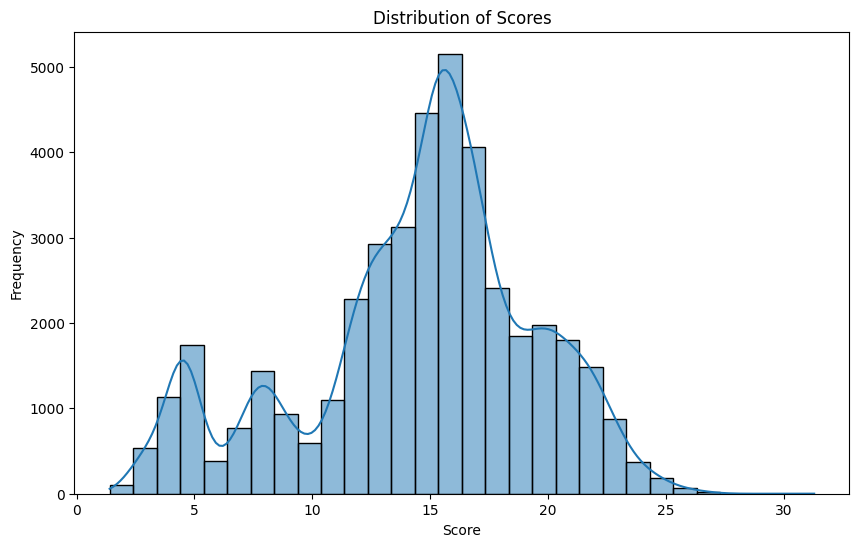

In [16]:
# Histogram of Scores good for frequency distribution of a single variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'].dropna(), bins=30, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Interpretation of histogram:represents readmission rates in hospitals. right-skewed, peak around mean value 14.5. Multiple peaks probably other subgroups wihtin the data. Most scoreas are between 5 and 20, few outliers beyond 25

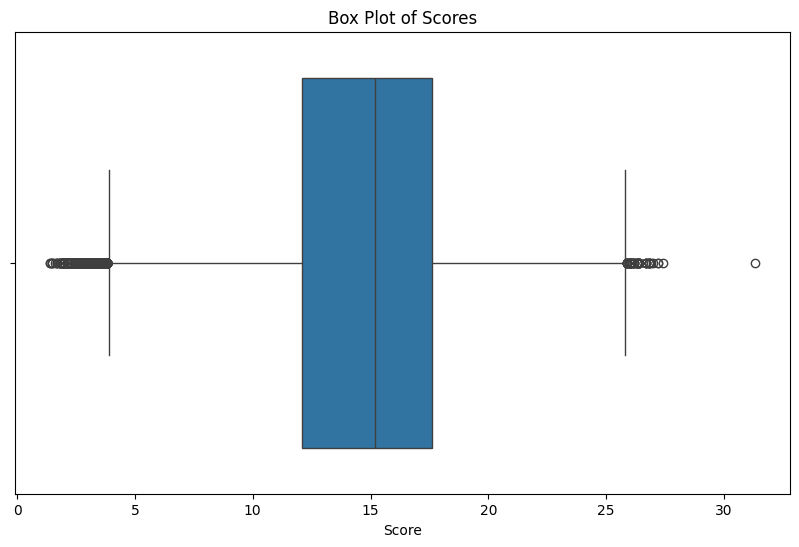

In [17]:
# Box Plot of Scores display distribution and identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Score'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()

Interpretation Box Plot: it shows the spread of the score and highlights potential outliers.
Median score is around 15.2.
The IQE is between 12.1 and 17.6 , showing where the middle 50% of scores lie.
Outliers are present on both ends beyong the whiskers, which represents 1.5 times the IQR from the quartiles.

Descriptive Statistics Summary:

Count: There are 41,785 non-null entries for each column after cleaning.
Mean:
Denominator: 389.24 (average number of cases).
Score: 14.51 (average readmission rate).
Lower Estimate: 11.85 (average lower confidence interval for the score).
Higher Estimate: 17.73 (average higher confidence interval for the score).

Standard Deviation:
Denominator: 803.00 (high variability in the number of cases).
Score: 4.95 (moderate variability in readmission rates).
Lower Estimate: 4.54.
Higher Estimate: 5.43.

Quartiles:
Denominator: The middle 50% of data ranges from 77 to 387.
Score: The middle 50% of readmission rates range from 12.1 to 17.6.
Lower Estimate: Ranges from 9.3 to 14.9.
Higher Estimate: Ranges from 15.4 to 21.3.

Advanced Analysis

Scatter Plot of Scores vs Denominator
Objective: analyse relationship between Score and Denominator

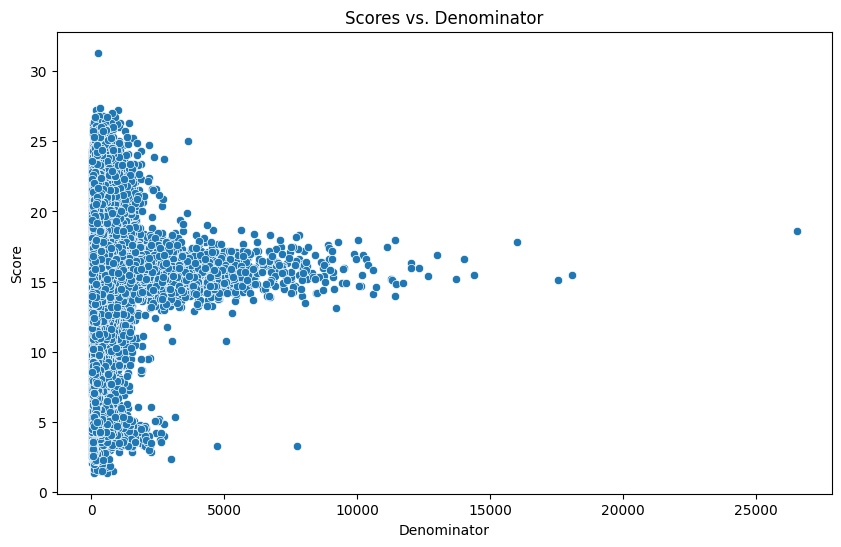

In [18]:
# Scatter Plot of Scores vs. Denominator
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Denominator'], y=df['Score'])
plt.title('Scores vs. Denominator')
plt.xlabel('Denominator')
plt.ylabel('Score')
plt.show()


**Interpretation of Scatter Plot of Scores vs Denominator:** it shows the relationship between the number of cases (Denominator) and the readmission scores.
**Insights:**
The majority of data points are clustered on the left side, indicating that most hospitals have a smaller number of cases.
There doesn't appear to be a strong correlation between the number of cases and the readmission score.
Some hospitals with a very high number of cases (> 5000) have varied readmission scores, indicating that size alone does not determine performance.

Box Plot of Scores by State
Objective: compare readmission scores across different states

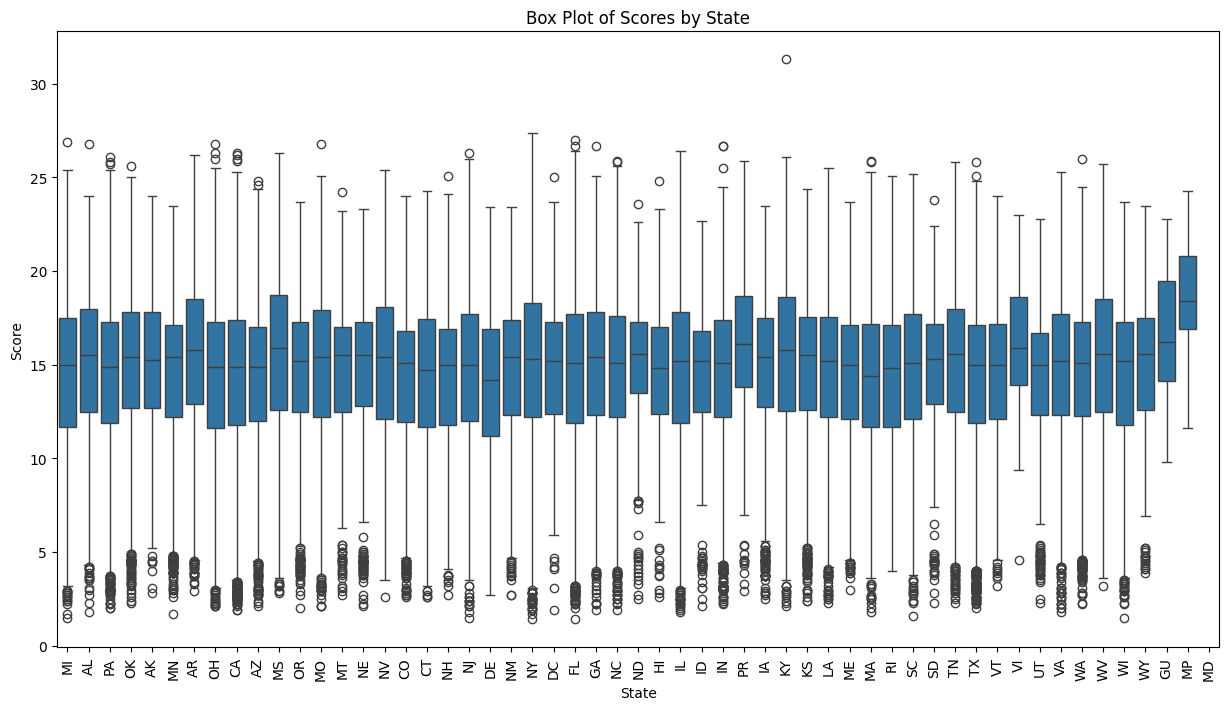

In [19]:
# Box Plot of Scores by State
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Score', data=df)
plt.title('Box Plot of Scores by State')
plt.xlabel('State')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()


**Box Plot of Scores by State:** it compares the distribution of readmission scores across different states.
**Insights:**
The median scores across states is consistent generally around 14-16.
Some states show a wider range of scores, indicating greater variability in hospital performance.
Outliers are present in nearly all states, suggesting that certain hospitals have significantly different readmission rates compared to others within the same state.

Correlation Analysis
Objective: identify correlations between numerical columns

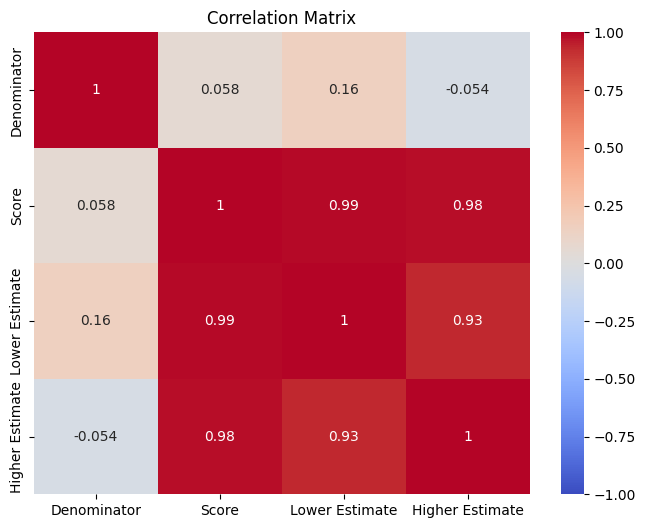

In [20]:
# Calculate correlation matrix
correlation_matrix = df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Results interpretation
**Correlation Matrix:**The heatmap shows the correlation between different numerical variables.
**Insights:**
*Score, Lower Estimate, and Higher Estimate* are highly correlated with each other, as expected since they represent related metrics.
*Denominator* has a very weak correlation with Score, indicating that the number of cases does not strongly influence readmission scores.

Analysis of specific measures
Objective: identify which measures have higher readmission rates(e.g..type of treatments)

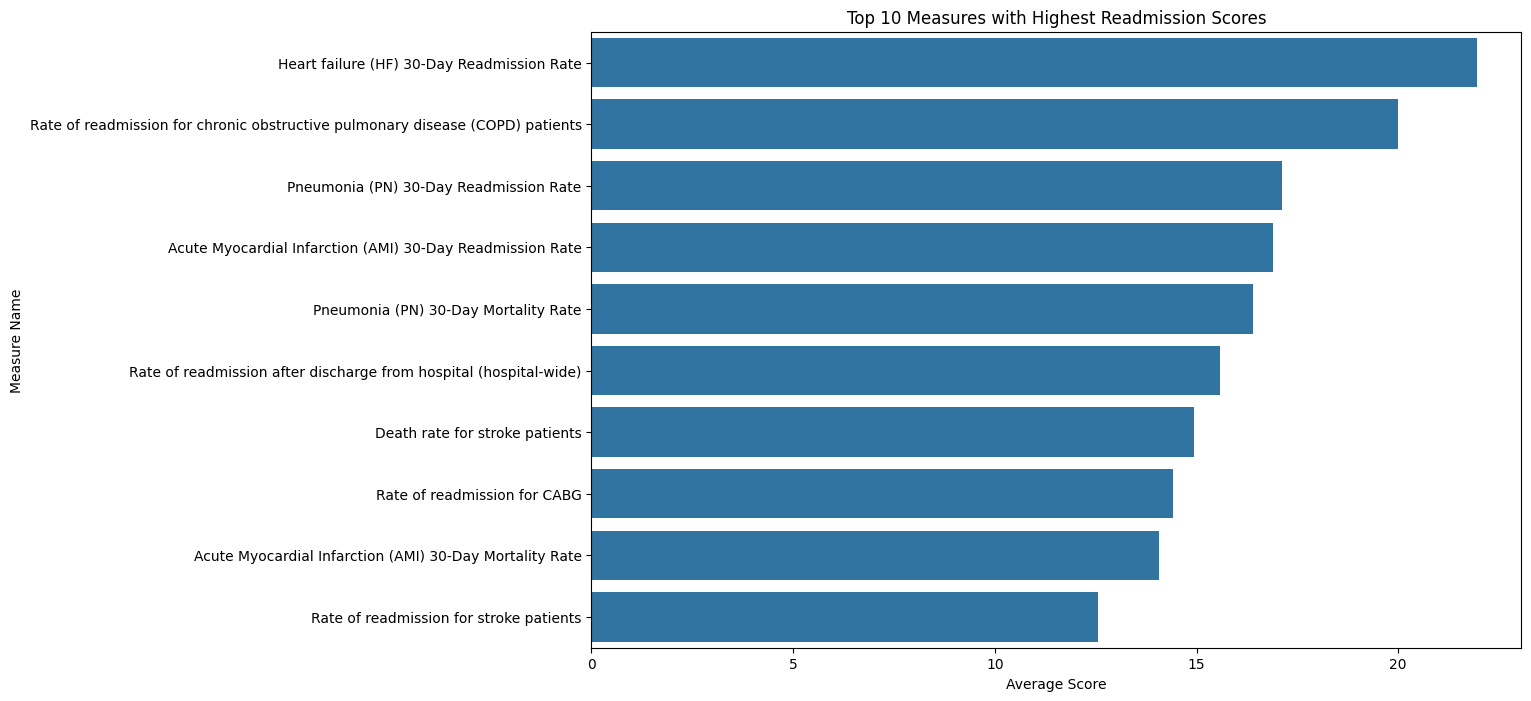

In [22]:
# Group by Measure Name and calculate mean score
measure_scores = df.groupby('Measure Name')['Score'].mean().sort_values(ascending=False)

# Plot the top 10 measures with the highest scores
plt.figure(figsize=(12, 8))
sns.barplot(x=measure_scores.head(10), y=measure_scores.head(10).index)
plt.title('Top 10 Measures with Highest Readmission Scores')
plt.xlabel('Average Score')
plt.ylabel('Measure Name')
plt.show()

**Analysis of Specific Measures:** This bar plot shows the top 10 measures with the highest average readmission scores.
**Insights:**
*Heart failure* (HF) 30-Day Readmission Rate has the highest average readmission score.
Measures related to chronic obstructive pulmonary disease (COPD), pneumonia, acute myocardial infarction (AMI), and stroke are also among the highest.
These findings suggest that certain conditions and treatments are associated with higher readmission rates, which could be targeted for quality improvement initiatives.

Scatter Plot vs Denominator
Objective: To explore if there is any relationship between the number of cases (Denominator) and the readmission scores. It can help in identifying if larger hospitals (with more cases) have different readmission rates comoared to smaller hospitals

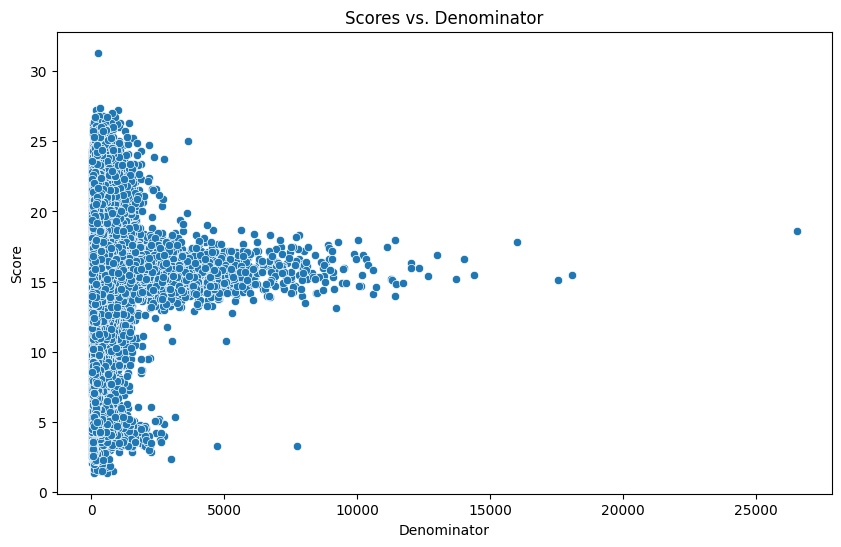

In [23]:
# Scatter Plot of Scores vs. Denominator
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Denominator'], y=df['Score'])
plt.title('Scores vs. Denominator')
plt.xlabel('Denominator')
plt.ylabel('Score')
plt.show()

Interpretation of results:**Scatter Plot of Scores vs. Denominator** No strong correlation between the number of cases and readmission scores suggests that factors other than hospital size influence readmission rates.

Blox Plot of Scores by State
Objective: To compare readmission scores across different states.
 Geographic analysis can reveal regional differences in healthcare quality and outcomes, potentially indicating areas that need improvement.

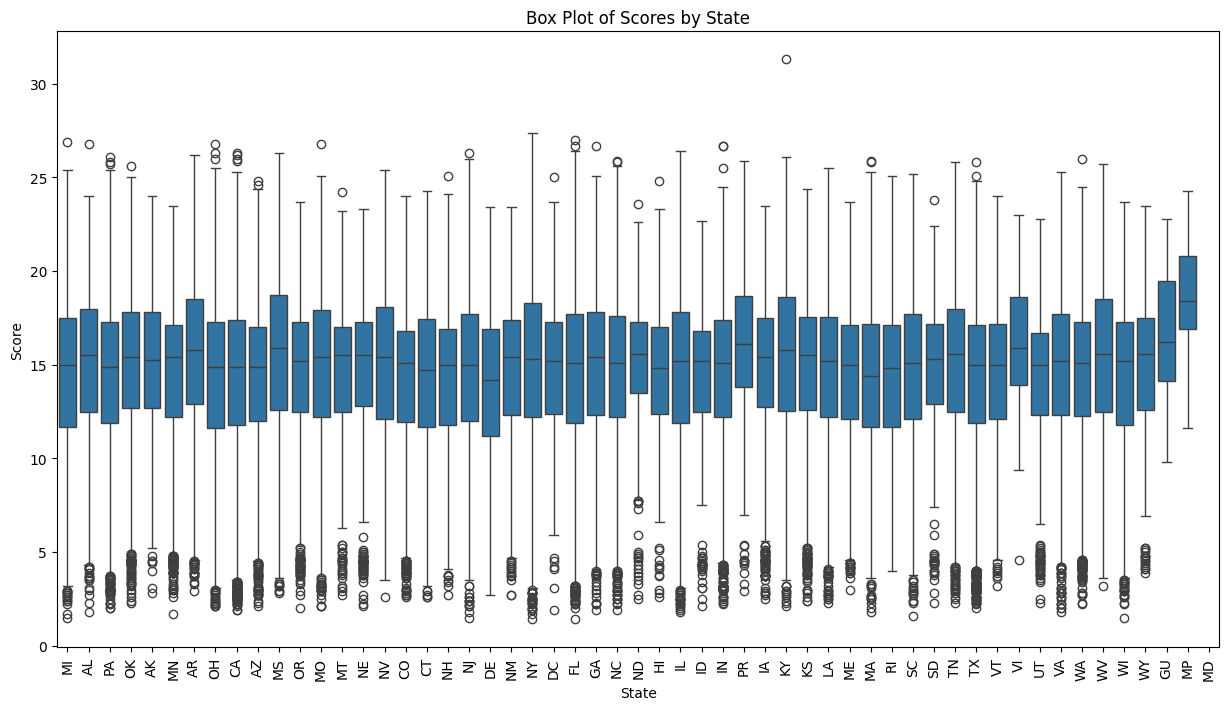

In [24]:
# Box Plot of Scores by State
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Score', data=df)
plt.title('Box Plot of Scores by State')
plt.xlabel('State')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()


**Interpretation of Box Plot of Scores by State**:The median readmission scores are consistent across states, with some variability and outliers.
Insight: Consistency in median scores suggests uniformity in healthcare quality across states, but outliers indicate areas needing attention.

Correlation Analysis:
Objective: To identify how different numerical variables relate to each other. Correlation analysis helps in understanding which factors might influence readmission rates and can guide further in-depth analysis.

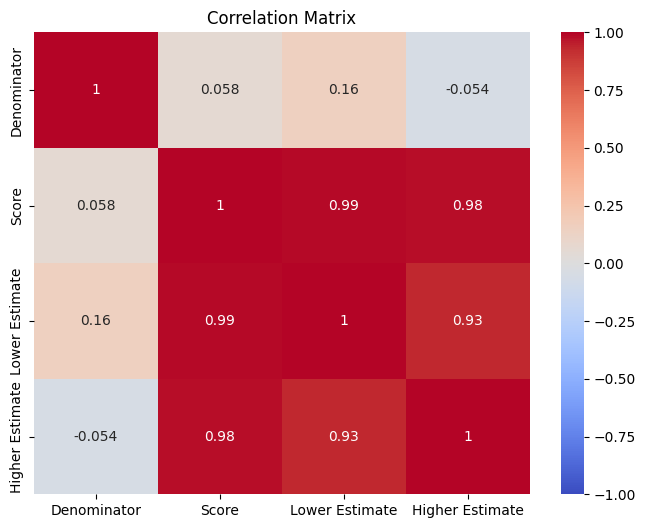

In [25]:
# Calculate correlation matrix
correlation_matrix = df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**Interpretation Coreelation Matrix**:High correlations among Score, Lower Estimate, and Higher Estimate. Very weak correlation between Denominator and Score.
Insight: The score metrics are interrelated, but the number of cases doesn't significantly influence the readmission score.

Analysis of Specific Measures:
Objective: To identify which specific measures (types of treatments or conditions) have the highest readmission scores.
Highlighting high-risk measures can help in targeting specific areas for quality improvement initiatives in healthcare.

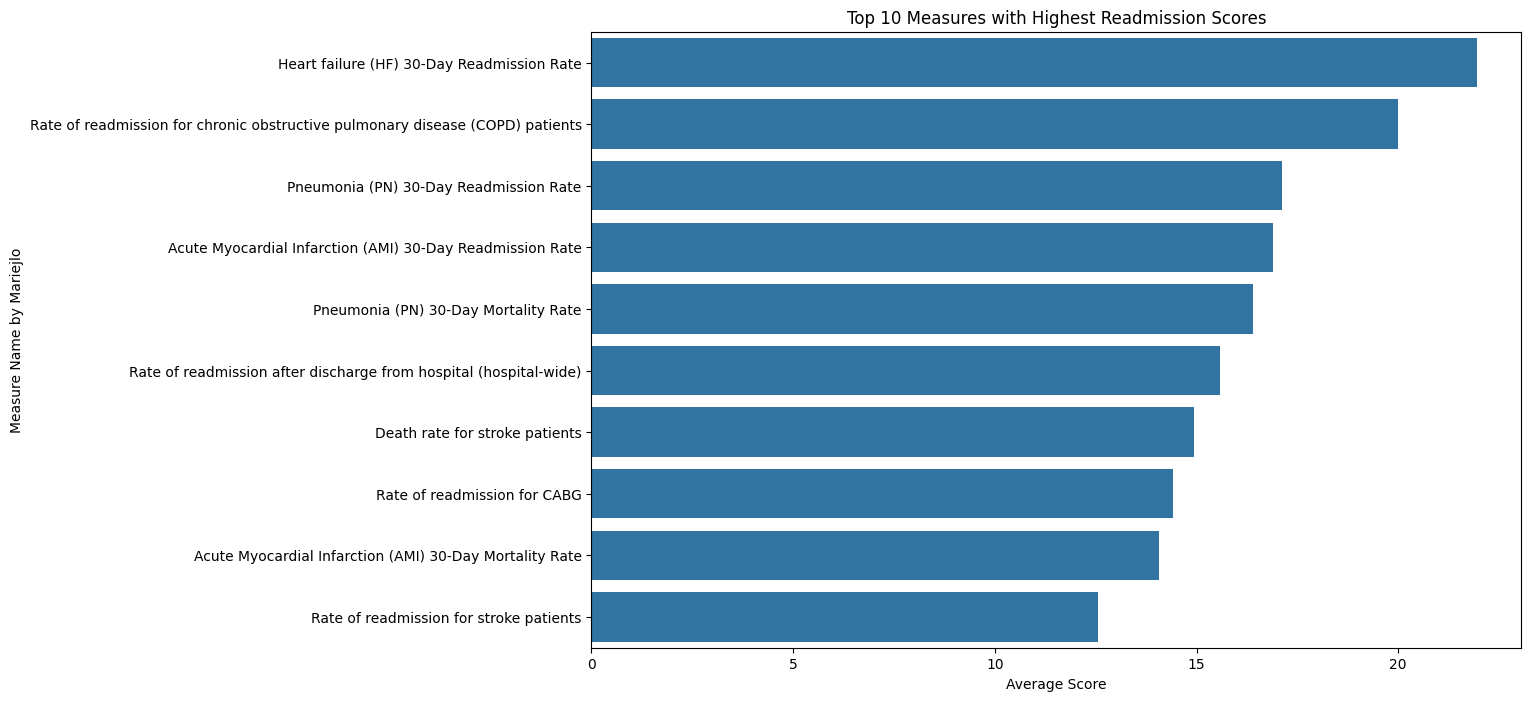

In [28]:
# Group by Measure Name and calculate mean score
measure_scores = df.groupby('Measure Name')['Score'].mean().sort_values(ascending=False)

# Plot the top 10 measures with the highest scores
plt.figure(figsize=(12, 8))
sns.barplot(x=measure_scores.head(10), y=measure_scores.head(10).index)
plt.title('Top 10 Measures with Highest Readmission Scores')
plt.xlabel('Average Score')
plt.ylabel('Measure Name by Mariejlo')
plt.show()


Interpretation results **Top 10 Measures with Highest Readmission Scores:** Heart failure and chronic obstructive pulmonary disease (COPD) have the highest readmission rates.
Insight: Focus on these conditions for interventions to reduce readmission rates.

IDENTIFY OUTLIERS and Conduct further research
Investigate hospitals with significantly high or low readmission scores to understand underlying factors.

In [29]:
# Identify outliers based on the IQR method for Scores
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Score'] < (Q1 - 1.5 * IQR)) | (df['Score'] > (Q3 + 1.5 * IQR))]
outliers


,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Measure Start Date,Measure End Date,Location
30,30,230130,"BEAUMONT HOSPITAL, ROYAL OAK",3601 W THIRTEEN MILE RD,ROYAL OAK,MI,48073,OAKLAND,2488985000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,285.0,3.4,2.1,5.8,07/01/2012,06/30/2015,"3601 W THIRTEEN MILE RD\nROYAL OAK, MI 48073\n..."
42,42,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,9893629301,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,151.0,3.8,2.7,5.6,07/01/2012,06/30/2015,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
62,62,230142,BEAUMONT HOSPITAL - WAYNE,33155 ANNAPOLIS AVE,WAYNE,MI,48184,WAYNE,7344674175,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Worse than the National Rate,336.0,26.9,23.6,30.4,07/01/2012,06/30/2015,"33155 ANNAPOLIS AVE\nWAYNE, MI 48184\n(42.2742..."
66,66,230141,MCLAREN FLINT,401 S BALLENGER HIGHWAY,FLINT,MI,48532,GENESEE,8103422000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,252.0,3.2,2.0,4.8,07/01/2012,06/30/2015,"401 S BALLENGER HIGHWAY\nFLINT, MI 48532\n(43...."
93,93,230117,BORGESS MEDICAL CENTER,1521 GULL ROAD,KALAMAZOO,MI,49048,KALAMAZOO,2692267000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,214.0,3.3,1.9,5.9,07/01/2012,06/30/2015,"1521 GULL ROAD\nKALAMAZOO, MI 49048\n(42.30475..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64196,64196,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,BEXAR,2106382100,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,68.0,3.4,1.9,5.9,07/01/2012,06/30/2015,"1139 E SONTERRA BLVD\nSAN ANTONIO, TX 78258\n(..."
64431,64431,670023,METHODIST MANSFIELD MEDICAL CENTER,2700 E BROAD STREET,MANSFIELD,TX,76063,TARRANT,6826222059,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,46.0,3.1,1.4,6.3,07/01/2012,06/30/2015,"2700 E BROAD STREET\nMANSFIELD, TX 76063\n(32...."
64523,64523,670071,TEXAS HEALTH HEART & VASCULAR HOSPITAL ARLINGTON,811 WRIGHT STREET,ARLINGTON,TX,76012,TARRANT,8179603500,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,62.0,2.6,1.1,5.7,07/01/2012,06/30/2015,"811 WRIGHT STREET\nARLINGTON, TX 76012\n(32.74..."
64564,64564,670024,NORTH CYPRESS MEDICAL CENTER,21214 NORTHWEST FREEWAY,CYPRESS,TX,77429,HARRIS,2818900203,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,47.0,3.6,1.8,7.0,07/01/2012,06/30/2015,"21214 NORTHWEST FREEWAY\nCYPRESS, TX 77429\n(2..."


**Interpretation of outliers:** These outliers are hospitals with significantly different readmission scores compared to others, with high readmission rates for heart failure could be targeted for quality improvement
BEAUMONT HOSPITAL - WAYNE: Heart failure (HF) 30-Day Readmission Rate of 26.9 (worse than the national rate).
Several hospitals with very low death rates for CABG (Coronary Artery Bypass Grafting) procedures maybe specialised practices or superior care quality.

**Dive into High-Risk measures**: Focus on the top measures with the highest readmission scores and analyze potential causes.

In [30]:
# Filter data for high-risk measures (e.g., Heart Failure)
high_risk_measures = ['Heart failure (HF) 30-Day Readmission Rate', 'Rate of readmission for chronic obstructive pulmonary disease (COPD) patients']
df_high_risk = df[df['Measure Name'].isin(high_risk_measures)]
df_high_risk.groupby('Measure Name')['Score'].describe()


,count,mean,std,min,25%,50%,75%,max
Measure Name,,,,,,,,
Heart failure (HF) 30-Day Readmission Rate,3660.0,21.956284,1.497790,16.3,21.0,21.9,22.8,31.3
Rate of readmission for chronic obstructive pulmonary disease (COPD) patients,3657.0,20.000027,1.270119,15.9,19.2,19.9,20.7,26.1


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

Interpretation:

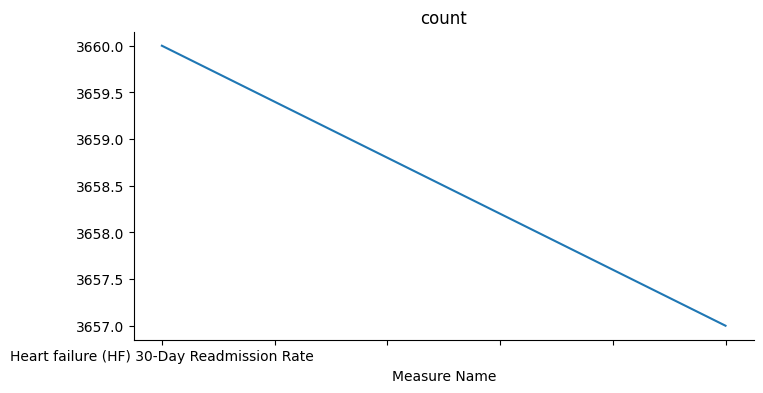

In [33]:
from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

**Exploring relationships** between high-risk measures and other variables.

Statistical Test: Compare readmission rates across different groups and test for significant differences.

In [31]:
from scipy.stats import f_oneway

# ANOVA test to compare scores across states
states = df['State'].unique()
score_groups = [df[df['State'] == state]['Score'].dropna() for state in states]
anova_result = f_oneway(*score_groups)
anova_result


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

Anova turned Nan values maybe some groups are empty next step check data groups

In [37]:
#Check data groups
states = df['State'].unique()
score_groups = [df[df['State'] == state]['Score'].dropna() for state in states]
empty_groups = [state for state, group in zip(states, score_groups) if len(group) == 0]
empty_groups


['MD']

**ANOVA test** examines whether there are significant differences in readmissions scores across different states.

In [38]:
#Exclude empty groups and rerun ANOVA test
score_groups = [group for group in score_groups if len(group) > 0]
anova_result = f_oneway(*score_groups)
anova_result


F_onewayResult(statistic=4.070491191410202, pvalue=1.9159362396253272e-21)

Interpretation ANOVA results p close to zero indicates significant different in readmissions scores between at least some states

In [39]:
from scipy.stats import ttest_ind

# T-test to compare scores between two high-risk measures
hf_scores = df[df['Measure Name'] == 'Heart failure (HF) 30-Day Readmission Rate']['Score']
copd_scores = df[df['Measure Name'] == 'Rate of readmission for chronic obstructive pulmonary disease (COPD) patients']['Score']
ttest_result = ttest_ind(hf_scores, copd_scores, nan_policy='omit')
ttest_result


TtestResult(statistic=60.25065982669803, pvalue=0.0, df=7315.0)

**Interpretation t-test:** T-test between heart failure and COPD readmission rates showed a significant difference (p-value = 0.0). Suggesting different underlying factors or treatment effectiveness.

In [36]:
#Investigate outliers
# Display outliers identified earlier
outliers


,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Measure Start Date,Measure End Date,Location
30,30,230130,"BEAUMONT HOSPITAL, ROYAL OAK",3601 W THIRTEEN MILE RD,ROYAL OAK,MI,48073,OAKLAND,2488985000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,285.0,3.4,2.1,5.8,07/01/2012,06/30/2015,"3601 W THIRTEEN MILE RD\nROYAL OAK, MI 48073\n..."
42,42,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,9893629301,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,151.0,3.8,2.7,5.6,07/01/2012,06/30/2015,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
62,62,230142,BEAUMONT HOSPITAL - WAYNE,33155 ANNAPOLIS AVE,WAYNE,MI,48184,WAYNE,7344674175,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Worse than the National Rate,336.0,26.9,23.6,30.4,07/01/2012,06/30/2015,"33155 ANNAPOLIS AVE\nWAYNE, MI 48184\n(42.2742..."
66,66,230141,MCLAREN FLINT,401 S BALLENGER HIGHWAY,FLINT,MI,48532,GENESEE,8103422000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,252.0,3.2,2.0,4.8,07/01/2012,06/30/2015,"401 S BALLENGER HIGHWAY\nFLINT, MI 48532\n(43...."
93,93,230117,BORGESS MEDICAL CENTER,1521 GULL ROAD,KALAMAZOO,MI,49048,KALAMAZOO,2692267000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,214.0,3.3,1.9,5.9,07/01/2012,06/30/2015,"1521 GULL ROAD\nKALAMAZOO, MI 49048\n(42.30475..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64196,64196,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,BEXAR,2106382100,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,68.0,3.4,1.9,5.9,07/01/2012,06/30/2015,"1139 E SONTERRA BLVD\nSAN ANTONIO, TX 78258\n(..."
64431,64431,670023,METHODIST MANSFIELD MEDICAL CENTER,2700 E BROAD STREET,MANSFIELD,TX,76063,TARRANT,6826222059,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,46.0,3.1,1.4,6.3,07/01/2012,06/30/2015,"2700 E BROAD STREET\nMANSFIELD, TX 76063\n(32...."
64523,64523,670071,TEXAS HEALTH HEART & VASCULAR HOSPITAL ARLINGTON,811 WRIGHT STREET,ARLINGTON,TX,76012,TARRANT,8179603500,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,62.0,2.6,1.1,5.7,07/01/2012,06/30/2015,"811 WRIGHT STREET\nARLINGTON, TX 76012\n(32.74..."
64564,64564,670024,NORTH CYPRESS MEDICAL CENTER,21214 NORTHWEST FREEWAY,CYPRESS,TX,77429,HARRIS,2818900203,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,47.0,3.6,1.8,7.0,07/01/2012,06/30/2015,"21214 NORTHWEST FREEWAY\nCYPRESS, TX 77429\n(2..."


Interpretation outliers:
**BEAUMONT HOSPITAL - WAYNE**:Hospital has significant higher readmission rate for heart failure, indicating potential issues with treatment or post-discharge care.
**Several Hospitals with Low Mortality Rates for CABG**:These hospitals have exceptionally low mortality rates for CABG, which could indicate high-quality care or specialized expertise.

NEXT STEPS: Post-Hoc analysis for ANOVA: to identify specific state differences, such as Tukey's HSD (Honestly Significant Difference)

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for Tukey's HSD test
df_anova = df[['State', 'Score']].dropna()
tukey = pairwise_tukeyhsd(endog=df_anova['Score'], groups=df_anova['State'], alpha=0.05)

# Display the results
print(tukey)


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    AK     AL   0.2784    1.0  -1.6641  2.2209  False
    AK     AR   0.7664    1.0  -1.2068  2.7396  False
    AK     AZ  -0.5167    1.0  -2.4856  1.4521  False
    AK     CA  -0.3137    1.0  -2.1657  1.5382  False
    AK     CO  -0.4851    1.0  -2.4704  1.5002  False
    AK     CT  -0.3655    1.0  -2.4714  1.7404  False
    AK     DC   0.1239    1.0  -2.6897  2.9375  False
    AK     DE  -0.8159    1.0  -3.7238  2.0919  False
    AK     FL  -0.1271    1.0  -1.9956  1.7413  False
    AK     GA   0.1792    1.0  -1.7285  2.0869  False
    AK     GU   1.9789    1.0  -4.2948  8.2526  False
    AK     HI   -0.054    1.0  -2.5156  2.4075  False
    AK     IA   0.3091    1.0  -1.6307   2.249  False
    AK     ID  -0.3666    1.0  -2.5605  1.8272  False
    AK     IL  -0.0849    1.0  -1.9601  1.7903  False
    AK     IN  -0.2357    1.

Interpretation of Turkey HSD indicate there are statistically significant differences between the means of different groups

**Group Comparison:**
group1 and group2: These columns represent the pairs of groups being compared.

**Mean Difference (meandiff):**
This column shows the difference in means between the two groups.

**Adjusted P-value (p-adj):**
This column provides the p-value adjusted for multiple comparisons. A low p-value (typically less than 0.05) indicates a significant difference between the groups.

**Confidence Interval (lower, upper):**
These columns provide the lower and upper bounds of the 95% confidence interval for the mean difference. If the interval does not include zero, it suggests a significant difference.

**Reject:**
This column indicates whether the null hypothesis (that there is no difference between the means) can be rejected (True) or not (False).

FURTHER INVESTIGATION OUTLIERS- to investigate hospitals with extreme values to understand potential issues


In [41]:
# Display outliers identified earlier
outliers.head(10)  # Display the first 10 outliers for review


,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Measure Start Date,Measure End Date,Location
30,30,230130,"BEAUMONT HOSPITAL, ROYAL OAK",3601 W THIRTEEN MILE RD,ROYAL OAK,MI,48073,OAKLAND,2488985000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,285.0,3.4,2.1,5.8,07/01/2012,06/30/2015,"3601 W THIRTEEN MILE RD\nROYAL OAK, MI 48073\n..."
42,42,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,9893629301,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,151.0,3.8,2.7,5.6,07/01/2012,06/30/2015,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
62,62,230142,BEAUMONT HOSPITAL - WAYNE,33155 ANNAPOLIS AVE,WAYNE,MI,48184,WAYNE,7344674175,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,Worse than the National Rate,336.0,26.9,23.6,30.4,07/01/2012,06/30/2015,"33155 ANNAPOLIS AVE\nWAYNE, MI 48184\n(42.2742..."
66,66,230141,MCLAREN FLINT,401 S BALLENGER HIGHWAY,FLINT,MI,48532,GENESEE,8103422000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,252.0,3.2,2.0,4.8,07/01/2012,06/30/2015,"401 S BALLENGER HIGHWAY\nFLINT, MI 48532\n(43...."
93,93,230117,BORGESS MEDICAL CENTER,1521 GULL ROAD,KALAMAZOO,MI,49048,KALAMAZOO,2692267000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,214.0,3.3,1.9,5.9,07/01/2012,06/30/2015,"1521 GULL ROAD\nKALAMAZOO, MI 49048\n(42.30475..."
309,309,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,ETOWAH,2564944000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,126.0,3.7,2.0,7.3,07/01/2012,06/30/2015,"1007 GOODYEAR AVENUE\nGADSDEN, AL 35903\n(34.0..."
333,333,230167,MCLAREN GREATER LANSING,401 W GREENLAWN AVE,LANSING,MI,48910,INGHAM,5179756000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,63.0,2.6,1.3,4.8,07/01/2012,06/30/2015,"401 W GREENLAWN AVE\nLANSING, MI 48910\n(42.70..."
374,374,230195,ST JOHN MACOMB-OAKLAND HOSPITAL-MACOMB CENTER,11800 EAST TWELVE MILE ROAD,WARREN,MI,48093,MACOMB,5865735000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,93.0,3.5,1.8,6.5,07/01/2012,06/30/2015,"11800 EAST TWELVE MILE ROAD\nWARREN, MI 48093\..."
410,410,10055,FLOWERS HOSPITAL,4370 WEST MAIN STREET,DOTHAN,AL,36305,HOUSTON,3347935000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,135.0,3.6,2.1,6.4,07/01/2012,06/30/2015,"4370 WEST MAIN STREET\nDOTHAN, AL 36305\n(31.2..."
489,489,230222,MIDMICHIGAN MEDICAL CENTER-MIDLAND,4000 WELLNESS DRIVE,MIDLAND,MI,48670,MIDLAND,9898393000,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,149.0,3.4,1.9,6.0,07/01/2012,06/30/2015,"4000 WELLNESS DRIVE\nMIDLAND, MI 48670\n(43.63..."


In [44]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#Download data
#from google.colab import files
#cleaned_df.to_csv('cleaned_readmissions_and_deaths.csv', index=False)
#files.download('cleaned_readmissions_and_deaths.csv')


DEVELOP MODELS PREDICTING READ;MISSION PROBABILITIES

In [53]:
#Prepare environments
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [51]:
#Prepare feature and labels

# Prepare the data for modeling
X = df[['Denominator', 'Lower Estimate', 'Higher Estimate']]  # Features
y = df['Score']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TRAIN and EVALUATE MODELS

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

We cannot train in Linear regression because LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values.

In [58]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train contains missing values (Nans) and the RandomForestClassifier does not handle NaNs natively. To fix this, I will handle missing values before training the model.

In [60]:
# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
# Load your cleaned data
cleaned_df = pd.read_csv('/content/Readmissions_and_Deaths_-_Hospital.csv')


In [65]:
# Drop rows with missing values
cleaned_df = cleaned_df.dropna()


In [67]:
# Prepare features and target variable
X = df[['Denominator', 'Lower Estimate', 'Higher Estimate']]  # Features
y = df['Score']  # Target variable


In [68]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Check for missing values in the training data
print(X_train.isnull().sum())  # Print the number of missing values in each column


Denominator        18317
Lower Estimate     18317
Higher Estimate    18317
dtype: int64


In [71]:
#Library to fill missing values
from sklearn.impute import SimpleImputer

In [72]:
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the features
X = imputer.fit_transform(X)

In [76]:
# Create a DataFrame with imputed features
X = pd.DataFrame(X, columns=['Denominator', 'Lower Estimate', 'Higher Estimate'])


In [77]:
# Combine X and y into a single DataFrame to drop rows with NaN in y
data = X.copy()
data['Score'] = y


In [78]:
# Drop rows where the target variable 'Score' is NaN
data.dropna(subset=['Score'], inplace=True)


Problems with variable Y_train because it was continuous and the expects **RandomForestClassifier** library  categorical labels. Therefore below converted it to categorical labels instead of using a regression model

In [82]:
# Convert target variable 'Score' to categorical labels (example: bins)

bins = [0, 25, 50, 75, 100]
labels = ['low', 'medium', 'high', 'very high']
data['Score'] = pd.cut(data['Score'], bins=bins, labels=labels)

In [83]:
# Split the cleaned data back into features and target variable
X = data[['Denominator', 'Lower Estimate', 'Higher Estimate']]
y = data['Score']

In [84]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
#Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9997606796697379
Confusion Matrix:
[[8330    0]
 [   2   25]]
Classification Report:
              precision    recall  f1-score   support

         low       1.00      1.00      1.00      8330
      medium       1.00      0.93      0.96        27

    accuracy                           1.00      8357
   macro avg       1.00      0.96      0.98      8357
weighted avg       1.00      1.00      1.00      8357



Evaluation interpretation: model trained succesfully and the metrics shows very high performance. Then save Model using joblib library

In [89]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [90]:
import joblib
#Save model to google drive
# Specify the path in Google Drive
joblib_file = "/content/drive/My Drive/random_forest_model.pkl"
joblib.dump(model, joblib_file)


['/content/drive/My Drive/random_forest_model.pkl']

In [94]:
import joblib

joblib_file = "/content/drive/My Drive/random_forest_model.pkl"

# Load the model from the file
loaded_model = joblib.load(joblib_file)


In [95]:
# Make predictions on the test set
y_pred = loaded_model.predict(X_test)


EVALUATE THE MODEL

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [97]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

In [98]:
# Print evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9997606796697379
Confusion Matrix:
[[8330    0]
 [   2   25]]
Classification Report:
              precision    recall  f1-score   support

         low       1.00      1.00      1.00      8330
      medium       1.00      0.93      0.96        27

    accuracy                           1.00      8357
   macro avg       1.00      0.96      0.98      8357
weighted avg       1.00      1.00      1.00      8357



Interpretation of evaluation results...

**The accuracy** is extremely high (99.98%), indicating that the model is making very few mistakes overall.
The confusion matrix shows that the model is very good at correctly predicting the 'Low' class (8330 out of 8330) and also good at predicting the 'Medium' class (25 out of 27).
The classification report reveals perfect precision for both classes, meaning the model's positive predictions are very reliable.
The recall for the 'Medium' class is 0.93, which means that the model missed a small number of 'Medium' cases (2 out of 27).
The F1-score for the 'Medium' class is slightly lower (0.96) due to the lower recall.

In [99]:
import pandas as pd

# Create a DataFrame with the true labels and the predictions
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

Suggestions for further analysis:Over-sampling the 'Medium' class.
Under-sampling the 'Low' class.
Using different evaluation metrics that account for class imbalance, such as ROC-AUC.

In [100]:
# Save the results to a CSV file
results.to_csv('/content/drive/My Drive/predictions.csv', index=False)

Extras: model validation cross-validation to check for robustness

In [133]:
#Environment
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold #StratifiedKFold for cross-validation to ensure that each fold maintains the same distribution of class labels.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer #to fill NaN values with the median value of each column.

In [124]:
#Prepare data
# Check for missing values
missing_values = df['Score'].isnull().sum()
print(f'Missing values in Score column: {missing_values}')


Missing values in Score column: 0


In [125]:
# Check for infinite values
infinite_values = np.isinf(df['Score']).sum()
print(f'Infinite values in Score column: {infinite_values}')

Infinite values in Score column: 0


Handle missing values

In [138]:
# Fill missing values with the median in Score column
df['Score'].fillna(df['Score'].median(), inplace=True)

# Drop rows with infinite values
df = df[np.isfinite(df['Score'])]

In [139]:
# Ensure the Score column is now clean
missing_values = df['Score'].isnull().sum()
infinite_values = np.isinf(df['Score']).sum()
print(f'After cleaning: Missing values in Score column: {missing_values}, Infinite values in Score column: {infinite_values}')

After cleaning: Missing values in Score column: 0, Infinite values in Score column: 0


In [140]:
# Convert Score to integer
y = df['Score'].astype(int)

In [141]:
# Prepare the data
X = df[['Denominator', 'Lower Estimate', 'Higher Estimate']]  # Features
y = df['Score'].astype(int)  # Target variable, ensuring it's an integer for classification

In [142]:
# Handle missing values in X by imputing with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [143]:
# Check the distribution of the target variable
print(y.value_counts())

Score
15    28360
16     4465
14     3669
17     3032
13     3025
12     2764
4      1980
19     1951
18     1913
20     1905
11     1843
21     1661
7      1290
8      1170
22     1122
10      749
3       710
5       689
9       672
23      521
6       499
2       367
24      249
25       94
26       37
1        22
27        4
31        1
Name: count, dtype: int64


In [144]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [145]:
# Use stratified cross-validation to maintain the distribution of classes
stratified_cv = StratifiedKFold(n_splits=5)

In [146]:
# Perform cross-validation with stratified folds
scores = cross_val_score(model, X, y, cv=stratified_cv, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [147]:
# Print the results
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Standard deviation: {np.std(scores)}')

Cross-validation scores: [0.95676677 0.95931444 0.95753879 0.96008647 0.95846201]
Mean accuracy: 0.9584336981705178
Standard deviation: 0.0011906010649888122


Interpretation of the results...
### The distribution of classes in target variable **y** indicates a significant class imbalance. Some classes are highly populated (e.g., Score 15 with 28,360 instances) while others are very rare (e.g., Score 27 with 4 instances, and Score 31 with 1 instance).

Model is performing well on the dataset, with high accuracy across the different folds. The low standard deviation suggests that the model's performance is consistent across the different cross-validation splits.